In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df=pd.DataFrame(iris.data)
df.columns=iris.feature_names
df['Target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Feature Engineering

In [6]:
for i in df:
    if (df[i].dtypes=='float64')|(df[i].dtypes=='int32'):
        df[i]=df[i].astype('int16')

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df)

StandardScaler()

In [8]:
corr=df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.127335,0.788346,0.693228,0.720202
sepal width (cm),-0.127335,1.000000,-0.382160,-0.289575,-0.353748
petal length (cm),0.788346,-0.382160,1.000000,0.908784,0.947721
petal width (cm),0.693228,-0.289575,0.908784,1.000000,0.905835
Target,0.720202,-0.353748,0.947721,0.905835,1.000000


<Axes: >

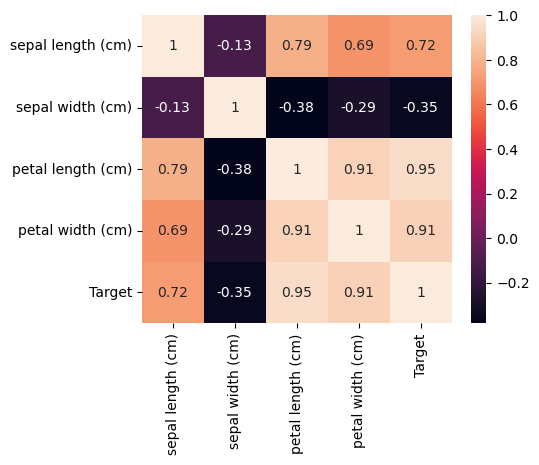

In [9]:
plt.figure(figsize=(5,4))
import seaborn as sns
sns.heatmap(corr,annot=True)

### Feature Selection

In [10]:
selected_feature=[]
for i in corr:
    if i=='Target':
        for j in corr:
            if corr[i][j]>=0.5:
                selected_feature.append(j)
            if corr[i][j]<= -5:
                selected_feature.append(j)

In [11]:
selected_feature

['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'Target']

In [12]:
X=df[selected_feature[:-1]]
# X

In [13]:
y=df[selected_feature[-1]]
# y

### Train_test_splitting

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

### Model Training

#### Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

98.0

#### Decision tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model2=dt.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
accuracy_score(y_pred2,y_test)*100

98.0

#### XG boost

In [18]:
import xgboost as xgb
xg=xgb.XGBRFClassifier()
model3=xg.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
accuracy_score(y_pred3,y_test)*100

98.0

### Hpyerparameter Tuning of Decision tree classifier

In [19]:
from sklearn.model_selection import RandomizedSearchCV
params = {"max_depth": [3, None],
              "max_features": [1, 9],
              "min_samples_leaf": [1, 9],
              "criterion": ["gini", "entropy","log_loss"]}

In [20]:
rs_model=RandomizedSearchCV(dt,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Subodhita\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 9],
                                        'min_samples_leaf': [1, 9]},
                   scoring='roc_auc', verbose=3)

In [21]:
rs_model.best_estimator_

DecisionTreeClassifier(max_features=9, min_samples_leaf=9)

In [22]:
classifier=DecisionTreeClassifier(max_depth=3, max_features=9, min_samples_leaf=9)
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=5)*100
score

array([ 90.,  95.,  90., 100.,  90.])

In [23]:
rs_model.best_params_

{'min_samples_leaf': 9,
 'max_features': 9,
 'max_depth': None,
 'criterion': 'gini'}

#### Final model

In [24]:
new_dt=DecisionTreeClassifier(min_samples_leaf=9, max_features=9, max_depth=3,criterion='gini' )
new_model=new_dt.fit(X_train,y_train)
y_pred_new=new_model.predict(X_test)
accuracy_score(y_pred_new,y_test)*100

98.0

### Save model

In [25]:
import pickle
with open('final_model_iris', 'wb') as file:  
    pickle.dump(new_model, file)

In [34]:
def calculate(n):
    if n == 1:
        return 1
    else:
        return n*calculate(n-1)
    
c=calculate(3)
print(c)

6


In [40]:
def reverse(s):
    if len(s) == 0:
        return s
    else:
       return reverse(s[1:]) + s[0]

r=reverse("riya")
print(r)

ayir
